In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Phase 1 - A

In [2]:
df = pd.read_csv('reviews3.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran..."
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10556 entries, 0 to 10555
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10556 non-null  int64 
 1   ProductId               10556 non-null  object
 2   UserId                  10556 non-null  object
 3   ProfileName             10556 non-null  object
 4   HelpfulnessNumerator    10556 non-null  int64 
 5   HelpfulnessDenominator  10556 non-null  int64 
 6   Score                   10556 non-null  int64 
 7   Time                    10556 non-null  int64 
 8   Summary                 10555 non-null  object
 9   Text                    10556 non-null  object
dtypes: int64(5), object(5)
memory usage: 824.8+ KB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10556.000000,10556.000000,10556.000000,10556.000000,1.055600e+04
mean,24916.887457,1.637647,2.114343,4.149204,1.294959e+09
std,14387.070744,5.524306,6.290436,1.329831,4.695672e+07
min,6.000000,0.000000,0.000000,1.000000,1.067645e+09
25%,12532.750000,0.000000,0.000000,4.000000,1.269130e+09
50%,24737.000000,0.000000,1.000000,5.000000,1.308269e+09
75%,37379.750000,2.000000,2.000000,5.000000,1.330387e+09
max,49997.000000,187.000000,216.000000,5.000000,1.351210e+09


In [6]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [7]:
df.duplicated().sum()

0

Phase 1 - B

Distro of ratings

In [8]:
#sns.barplot(df['Score'].value_counts())

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran..."
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...


Phase 2 - 1.

Next we need to clean and prepare the data

We shall map the sentiment analysis to 3 classes;  negative, neutral, positve

In [10]:
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative


We shall do a len count for each review and create a new column for this.

In [11]:
def review_len(df1):
    df1['Review_len'] = df1['Text'].apply(lambda x: len(str(x)))
    return df1

review_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive,634
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral,253
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive,147
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive,418
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative,125


In [12]:

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#initializing the stopwords and Lemmantization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
def clean_and_tokenize(text):

    text = str(text)
    #removing htmls if present.
    text = re.sub(r"<.*?>", " ", text)
    #Removing url links.
    text = re.sub(r"http\S+|www.\S+", " ", text)
    #removing non-alpha numeric characters.
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    #changing text to lowercase and fixing spaces.
    text = re.sub(r"\s+", " ", text).strip().lower()

    #tokenizing and the lemmatizing after
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return tokens

df['Tokens'] = df['Text'].apply(clean_and_tokenize)

print(df[['Text', 'Tokens']].head())

                                                Text  \
0  This is not an instant tea mix.  This actually...   
1  A friend's doctor recommended this to her for ...   
2  It's tasty although they say "a medley of oran...   
3  I'm diabetic and manage my weight and blood su...   
4  These were gross. It was like chomping down on...   

                                              Tokens  
0  [instant, tea, mix, actually, powdered, green,...  
1  [friend, doctor, recommended, weight, loss, ba...  
2  [tasty, although, say, medley, orange, mingled...  
3  [diabetic, manage, weight, blood, sugar, level...  
4  [gross, like, chomping, chunk, salt, regret, w...  


In [14]:
'''To be returned to take note'''
#df.to_csv('cleaned_reviews.csv', index=False)



'To be returned to take note'

We shall do a len count for each tokenized review and create a new column for this.

In [15]:
def token_len(df1):
    df1['Token_len'] = df1['Tokens'].apply(lambda x: len(str(x)))
    return df1

token_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len,Tokens,Token_len
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive,634,"[instant, tea, mix, actually, powdered, green,...",570
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral,253,"[friend, doctor, recommended, weight, loss, ba...",200
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive,147,"[tasty, although, say, medley, orange, mingled...",142
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive,418,"[diabetic, manage, weight, blood, sugar, level...",390
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative,125,"[gross, like, chomping, chunk, salt, regret, w...",98


We shall vectorize the text using tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  

tfidf_matrix = vectorizer.fit_transform(df['Text'].astype(str))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(f"\nTF-IDF matrix shape: {tfidf_df.shape}")
print(tfidf_df)
print(tfidf_df.max())


TF-IDF matrix shape: (10556, 5000)
             00  000   0g   10  100  10th   11  110        12  120  ...  zero  \
0      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
1      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
2      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
3      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
4      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
...         ...  ...  ...  ...  ...   ...  ...  ...       ...  ...  ...   ...   
10551  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10552  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10553  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10554  0.154121  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10555  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.062071  0.0  ...  

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate


MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 10000
embedding_dim = 100


tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])

from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])
y = np.eye(len(label_encoder.classes_))[y]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 10% validation, 10% test


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate


MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 10000
embedding_dim = 100

input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))


embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH)(input_layer)

conv_3 = Conv1D(filters=128, kernel_size=3, activation='relu')(embedding_layer)
conv_4 = Conv1D(filters=128, kernel_size=4, activation='relu')(embedding_layer)
conv_5 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)

pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

concat = Concatenate()([pool_3, pool_4, pool_5])

dropout = Dropout(0.5)(concat)


output = Dense(3, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  1,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 98, 128)   │     38,528 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 97, 128)   │     51,328 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 96, 128)   │     64,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      1,155 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,155,139 (4.41 MB)

 Trainable params: 1,155,139 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=64)


Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.7489 - loss: 0.7513 - val_accuracy: 0.8083 - val_loss: 0.5260
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.7865 - loss: 0.5598 - val_accuracy: 0.8521 - val_loss: 0.4191
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8520 - loss: 0.3928 - val_accuracy: 0.8556 - val_loss: 0.3874
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.9041 - loss: 0.2704 - val_accuracy: 0.8521 - val_loss: 0.4164
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.9391 - loss: 0.1784 - val_accuracy: 0.8414 - val_loss: 0.4673


TextCNN Accuracy: 0.8267
TextCNN Loss: 0.5352
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Additional Metrics:
Precision: 0.7952
Recall: 0.8267
F1-Score: 0.8032

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       167
           1       0.38      0.11      0.18        88
           2       0.87      0.95      0.91       801

    accuracy                           0.83      1056
   macro avg       0.63      0.55      0.57      1056
weighted avg       0.80      0.83      0.80      1056



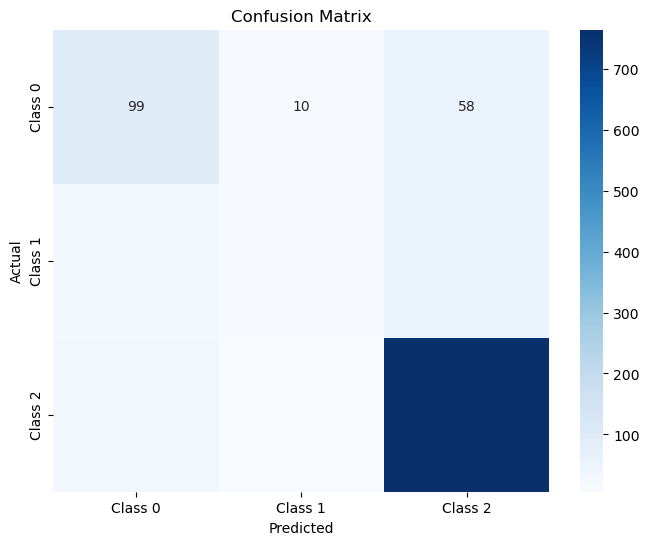

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"TextCNN Accuracy: {acc:.4f}")
print(f"TextCNN Loss: {loss:.4f}")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


y_true = np.argmax(y_test, axis=1)


precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

TextCNN shows good overall performance with accuracy 0.82 and weighted F1-score 0.79, reflecting a generally consistent balance between precision (0.78) and recall (0.82). The classification report, however, shows that performance is quite different across classes. Class 2 is notable with high metrics—precision (0.86), recall (0.95), and F1-score (0.90)—implying the model performs extremely well in detecting and correctly classifying instances from this class. Class 1, however, exhibits strong weakness with low precision (0.36), very low recall (0.09), and resultant F1-score of merely 0.15, which represents the inability of the model to classify true occurrences of this class. Class 0 is moderately weak with lower balanced precision (0.65) and recall (0.56), with the resultant F1-score of 0.60. The macro averages—precision (0.63), recall (0.53), and F1-score (0.55)—show the disparity in class-wise performance. The relatively high loss value of 0.5346 also suggests that while the model is overall good, particularly for Class 2, there are some points for improvement, most importantly in enhancing recall for the poorly performing classes like Class 1, potentially through class rebalancing, improved feature representation, or model tuning.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.44      0.54       319
     Neutral       0.36      0.03      0.05       168
    Positive       0.84      0.98      0.90      1625

    accuracy                           0.82      2112
   macro avg       0.64      0.48      0.50      2112
weighted avg       0.78      0.82      0.78      2112



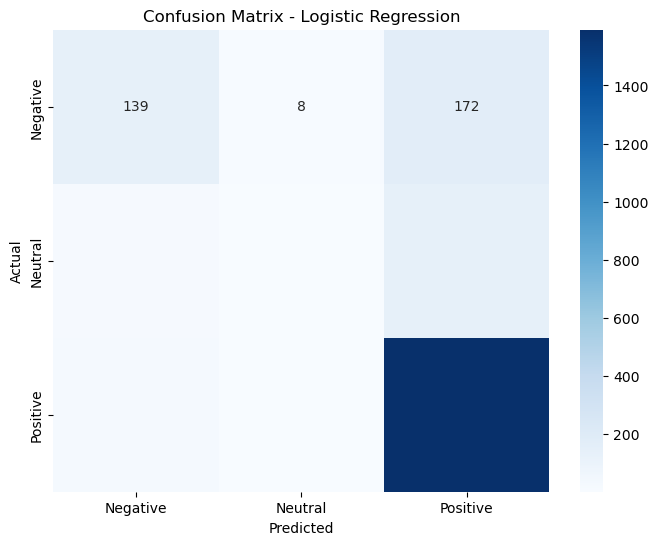

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Train/test split
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    tfidf_df, df['Sentiment_Encoded'], test_size=0.2, random_state=42
)


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_tfidf_train, y_tfidf_train)


y_pred_logreg = logreg.predict(X_tfidf_test)


print("Logistic Regression Classification Report:")
print(classification_report(y_tfidf_test, y_pred_logreg, target_names=label_encoder.classes_))


cm = confusion_matrix(y_tfidf_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The logistic regression model demonstrates excellent performance for the majority class (`Positive`), with high precision (0.84) and recall (0.98), reflecting its ability to accurately identify and predict this majority class, which is comprised of 1,625 samples. The model's performance significantly deteriorates for the minority classes. For `Negative`, the model possesses moderate precision (0.72) but low recall (0.43), reflecting a high false negative rate. The `Neutral` class performs the poorest, with ghastly accuracy (0.31), recall (0.02), and F1-score (0.04), likely due to its minimal size of only 168 cases compared to the dominating number of `Positive`. The macro average F1-score (0.49) and weighted average F1-score (0.78) are measures that indicate the overall bad performance of the model on all classes and hide these issues by assigning significant weight to the majority class. This imbalance reflects the need for techniques such as resampling, class weighting, or employing algorithms more suited to imbalanced data to improve the model's ability to handle minority classes better.

# Random Forest

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


x = tfidf_df
y = df["Sentiment"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier (n_estimators = 100, random_state = 42, n_jobs = -1)
rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


print("Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8110795454545454

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.28      0.42       313
     Neutral       0.80      0.05      0.09       170
    Positive       0.81      0.99      0.89      1629

    accuracy                           0.81      2112
   macro avg       0.80      0.44      0.47      2112
weighted avg       0.81      0.81      0.76      2112


Confusion Matrix:
[[  88    1  224]
 [  11    8  151]
 [  11    1 1617]]


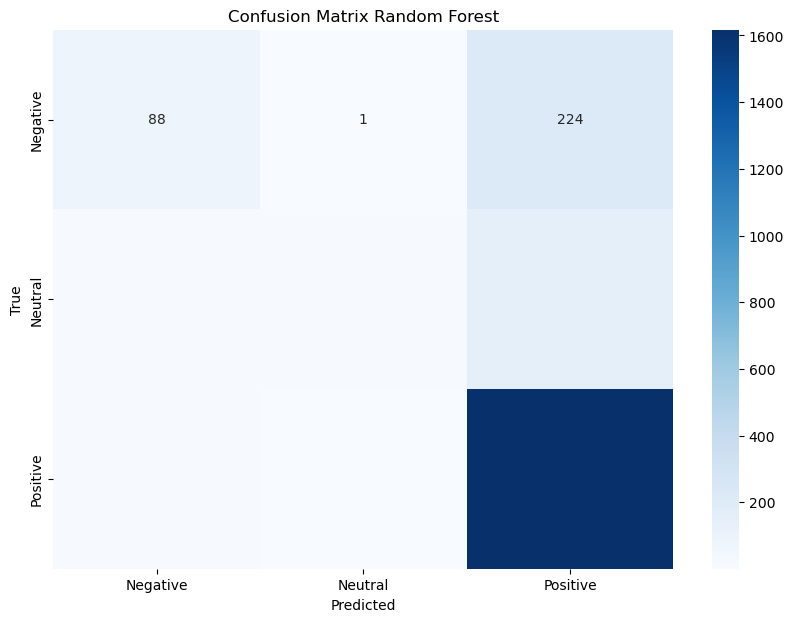

In [23]:
# confusion matrix
cm = confusion_matrix ( y_test, y_pred, labels= ['Negative', 'Neutral', 'Positive'])
plt.figure (figsize = (10, 7))
sns.heatmap (cm, annot = True, fmt='d', cmap = 'Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
              yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


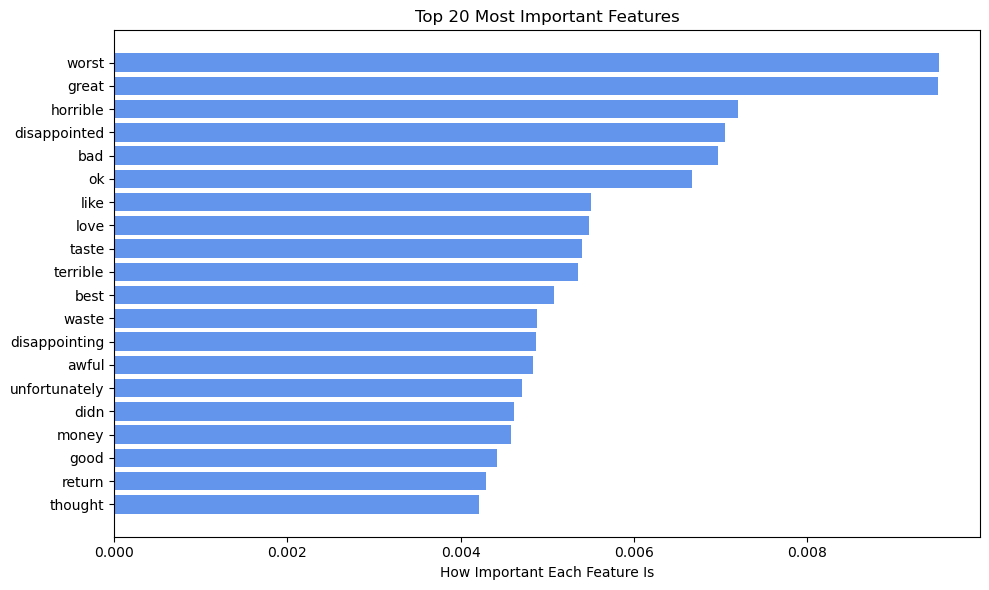

In [24]:
feat_importance = rf_model.feature_importances_


top_n = 20
top_indices = np.argsort(feat_importance)[-top_n:]
plt.figure(figsize=(10, 6))  
plt.title('Top 20 Most Important Features')
plt.barh(range(len(top_indices)),
         feat_importance[top_indices],
         color='cornflowerblue',  
         align='center')

try:
    words = vectorizer.get_feature_names_out()
except:
   
    words = vectorizer.get_feature_names()
 


plt.yticks(range(len(top_indices)),
          [words[i] for i in top_indices])

plt.xlabel('How Important Each Feature Is')

plt.tight_layout()  
plt.show()



# Analysis of the Random forest model
- The model achieved an everall accuracy of 75.7% on the test set, which is decent.
- Accuracy alone does not tell the full story given the class imbalance in the data.

### Class-Specific Performance
##### Positive Sentiment
- Very good performance: 98% recall and 85% F1-score
- High precision (75%): When the model predicts Positive, it's usually right
- Dominates predictions: 1031 out of 1049 positive cases correctly identified

##### Negative Sentiment
- Moderate performance: 52% F1-score
- High precision (79%): Negative predictions are reliable
- Low recall (38%): Misses many actual negative cases (193 out of 313)
- Neutral Sentiment

##### Poor performance: Only 10% F1-score
- Very low recall (5%): Fails to identify most neutral cases (only 9 out of 170)
- Moderate precision (64%): But with very few predictions made

### Confusion Matrix Insights
- The model strongly favors Positive predictions (1031 correct vs only 190+145 incorrect)
- Neutral class is frequently mislabeled as Positive (145 instances)
- Negative class is frequently mislabeled as Positive (190 instances)
- Very few instances are labeled as Neutral (only 14 total predictions)

### Feature Importance
- The 20 most important features (words) were graphed, showing which words held the highest predictive power. This helps to understand what the model is making decisions based on.

### Recommendations for Improvement
1. Address Class Imbalance:
The split appears to be strongly skewed towards Positive sentiment (1049 test cases vs 313 Negative and 170 Neutral).
Consider techniques like SMOTE, class weights, or stratified sampling

2. Improve Neutral Detection:
The model effectively ignores the Neutral class
Can perhaps need more Neutral examples or feature engineering to successfully detect neutrality

3. Threshold Adjustment:
Can possibly experiment with prediction thresholds to increase recall for Negative/Neutral classes

4. Alternative Models:
Experiment models that might be better suited to handle imbalanced data (e.g., XGBoost with class weights)

5. Feature Engineering:
Explore if more features (apart from TF-IDF) would be capable of distinguishing Neutral cases
Experiment n-grams or sentiment lexicon features

6. Error Analysis:
Manually verify cases where Negative/Neutral were predicted as Positive to search for patterns

The model performs well on Positive sentiment detection but poorly on the minority classes, particularly Neutral. This might be acceptable if Positive detection is primarily utilized but not acceptable if all three classes are of equal importance.